In [2]:
import os.path
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame

In [53]:
"""Load files into memory"""

# Baseline results
TEST_RESULT_FOLDER = Path("C:\\Users\\tizia\\PycharmProjects\\DDQN_Trading_MSC\\model_archive\\TestResults")
GRAPH_OUTPUT = Path("./graphs")
BASE_LINES = TEST_RESULT_FOLDER.joinpath("Baseline_refined_DDQN")
RUNTIME_RELATIVE = "rewards.csv"
METRICS_RELATIVE = "final\\validation\\metrics.csv"
REFERENCE_CAPITAL = "final\\validation\\test_reference_raw.csv"

MODEL_TYPE = "DDQN"

runtime_protocols = []
protocol_cols = [
    'steps',
    'avg_reward',
    'avg_loss',
    'avg_td_error',
    'capital'
]

result_metrics = []
metric_cols = [
    'model_name',
    'stock',
    'evaluation_mode',
    'V_i',
    'V_f',
    'return',
    'total_volatility',
    'sharpe_ratio',
    'transactions_per_30_t'
]

capital_references = []

if os.path.exists(BASE_LINES):
    file_names = os.listdir(BASE_LINES)
    print(f"Found {len(file_names)} potential baseline result folders:")
    print(file_names)
    for i, f_name in enumerate(file_names):
        file = BASE_LINES.joinpath(f_name)
        if os.path.isdir(file):
            rp_df = pd.read_csv(file.joinpath(RUNTIME_RELATIVE))
            rp_df = rp_df[protocol_cols]
            runtime_protocols.append(rp_df)
            rm_df = pd.read_csv(file.joinpath(METRICS_RELATIVE))
            rm_df = rm_df[metric_cols]
            result_metrics.append(rm_df)
            cr_df = pd.read_csv(file.joinpath(REFERENCE_CAPITAL))
            cr_df = cr_df[['portfolio']].values[0][0]
            capital_references.append(cr_df)
            print(f"[{i}] protocol:{rp_df.shape}, metrics:{rm_df.shape}")
    if len(runtime_protocols) > 0 and len(result_metrics) > 0:
        print("-"*10 + "EXAMPLE VALUES" + "-"*56)
        print(f"Protocol:\n{runtime_protocols[0]}")
        print("-"*80)
        print(f"Metrics:\n{result_metrics[0]}")
        print("-"*80)
        print(f"Capital Ref:\n{capital_references[0]}")
        print("-"*80)
else:
    print(f"Folder: {BASE_LINES} was not found. Nothing was loaded.")

Found 9 potential baseline result folders:
['1695443731', '1695443738', '1695445218', '1695445228', '1695446675', '1695446693', '1695448120', '1695448139', '1695482633']
[0] protocol:(1500, 5), metrics:(3, 9)
[1] protocol:(1500, 5), metrics:(3, 9)
[2] protocol:(1500, 5), metrics:(3, 9)
[3] protocol:(1500, 5), metrics:(3, 9)
[4] protocol:(1500, 5), metrics:(3, 9)
[5] protocol:(1500, 5), metrics:(3, 9)
[6] protocol:(1500, 5), metrics:(3, 9)
[7] protocol:(1500, 5), metrics:(3, 9)
[8] protocol:(1500, 5), metrics:(3, 9)
----------EXAMPLE VALUES--------------------------------------------------------
Protocol:
      steps  avg_reward  avg_loss  avg_td_error       capital
0        36 -106.300218  3.087509    -43.622748     22.496970
1        72 -102.352980  3.370878    -43.629669     24.728521
2       108 -107.375190  3.452895    -48.977247     42.666537
3       144  -95.235433  3.258142    -45.894182     33.163342
4       180 -111.057610  3.457846    -53.266568     25.048795
...     ...     

In [4]:
# Referencing metric results
BASE_LINES_REF = TEST_RESULT_FOLDER.joinpath("Baseline_refined_DDQN")
result_metrics_ref = []
if os.path.exists(BASE_LINES_REF):
    file_names = os.listdir(BASE_LINES_REF)
    print(f"Found {len(file_names)} potential baseline_ref result folders:")
    print(file_names)
    for i, f_name in enumerate(file_names):
        file = BASE_LINES_REF.joinpath(f_name)
        if os.path.isdir(file):
            rm_df = pd.read_csv(file.joinpath(METRICS_RELATIVE))
            rm_df = rm_df[metric_cols]
            result_metrics_ref.append(rm_df)
            print(f"[{i}] metrics:{rm_df.shape}")
    if len(result_metrics_ref) > 0:
        print("-"*10 + "EXAMPLE VALUES" + "-"*56)
        print(f"Metrics:\n{result_metrics_ref[0]}")
        print("-"*80)
else:
    print(f"Folder: {BASE_LINES_REF} was not found. Nothing was loaded.")

Found 9 potential baseline_ref result folders:
['1695443731', '1695443738', '1695445218', '1695445228', '1695446675', '1695446693', '1695448120', '1695448139', '1695482633']
[0] metrics:(3, 9)
[1] metrics:(3, 9)
[2] metrics:(3, 9)
[3] metrics:(3, 9)
[4] metrics:(3, 9)
[5] metrics:(3, 9)
[6] metrics:(3, 9)
[7] metrics:(3, 9)
[8] metrics:(3, 9)
----------EXAMPLE VALUES--------------------------------------------------------
Metrics:
                      model_name   stock evaluation_mode      V_i       V_f   
0                   (*) Buy&Hold  Google             NaN  10000.0  13703.16  \
1  best_1368_for-seed_1234567890  Google           False  10000.0  16485.56   
2  best_1368_for-seed_1234567890  Google            True  10000.0  10136.05   

     return  total_volatility  sharpe_ratio  transactions_per_30_t  
0  0.370316          0.463065     -0.324561                   0.06  
1  0.648556          0.374753      0.341418                   2.74  
2  0.013605          0.026552    -19.0944

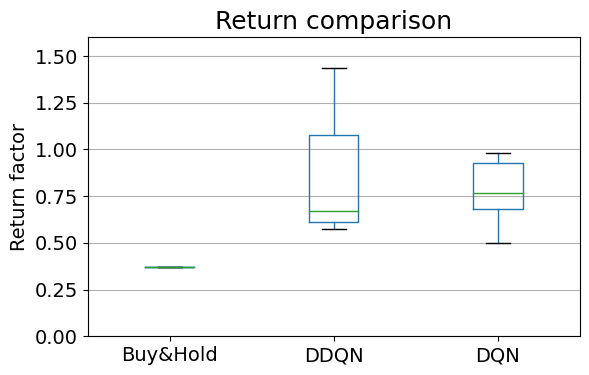

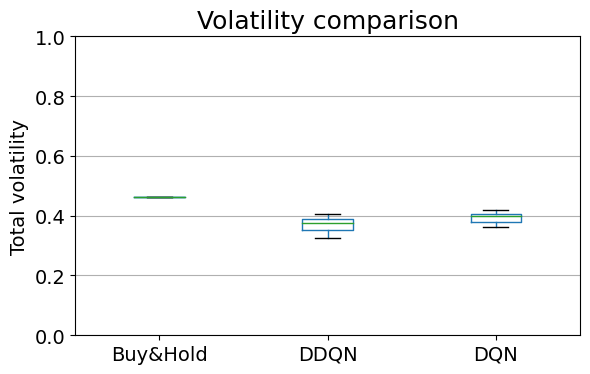

In [52]:
"""Metric box plots - probably not needed for a single configuration."""
metric_df_1 = pd.concat(result_metrics).reset_index(drop=True).fillna(-1)
#metric_df_1['evaluation_mode'] = metric_df_1['evaluation_mode'].astype(int)
metric_df_1['type'] = 'DQN'
bh_row = metric_df_1.head(1).copy()
bh_row['type'] = 'Buy&Hold'
bh_row['evaluation_mode'] = 'n/a'
bh_row = bh_row[['return', 'total_volatility', 'type']]
metric_df_1 = metric_df_1[metric_df_1['evaluation_mode']==False].reset_index(drop=True)
metric_df_1 = metric_df_1[['return', 'total_volatility', 'type', 'evaluation_mode']]

metric_df_2 = pd.concat(result_metrics_ref).reset_index(drop=True).fillna(-1)
#metric_df_2['evaluation_mode'] = metric_df_2['evaluation_mode'].astype(int)
metric_df_2['type'] = 'DDQN'
metric_df_2 = metric_df_2[metric_df_2['evaluation_mode']==False].reset_index(drop=True)
metric_df_2 = metric_df_2[['return', 'total_volatility', 'type', 'evaluation_mode']]



comparison_df = pd.concat([bh_row, metric_df_1, metric_df_2]).reset_index(drop=True)

comparison_df.boxplot(column=['return'], by=['type'], figsize=(6,4))
plt.suptitle('')
plt.tight_layout()
plt.title('Return comparison', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('')
plt.ylabel('Return factor', fontsize=14)
plt.ylim(0, 1.6)
plt.grid(axis='x')

plt.tight_layout()
plt.savefig(GRAPH_OUTPUT.joinpath("return_comparison.png"))
plt.show()
plt.close()


comparison_df.boxplot(column=['total_volatility'], by=['type'], figsize=(6,4))
plt.suptitle('')
plt.title('Volatility comparison', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('')
plt.ylabel('Total volatility', fontsize=14)
plt.ylim(0, 1.0)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(GRAPH_OUTPUT.joinpath("volatility_comparison.png"))
plt.show()
plt.close()

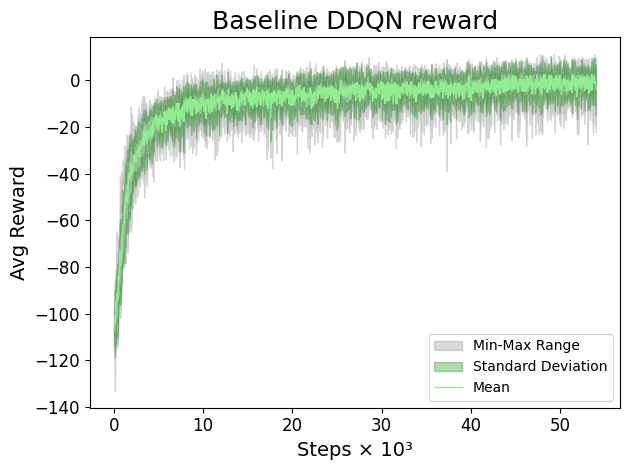

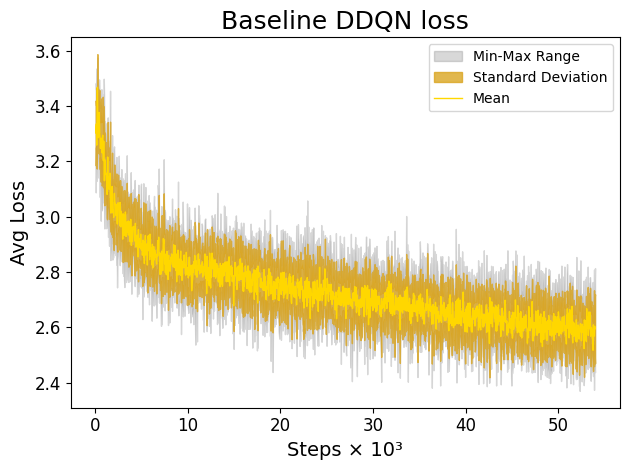

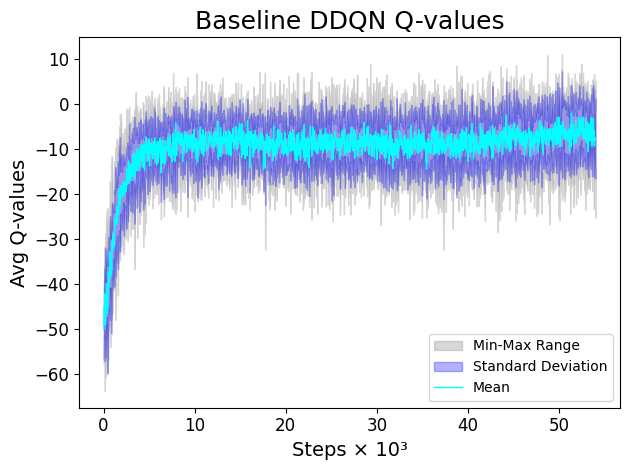

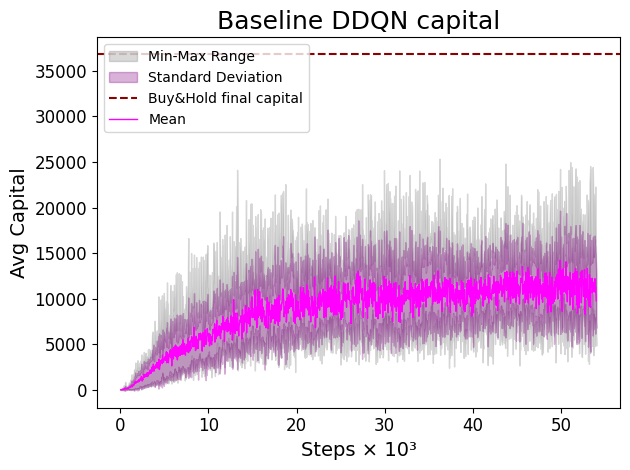

In [54]:
rewards_protocols = []
loss_protocols = []
q_protocols = []
cap_protocols = []
for i, p in enumerate(runtime_protocols):
    p = p.rename(columns={'avg_reward': f'reward_{i}', 'avg_loss': f'loss_{i}', 'avg_td_error': f'Q_{i}', 'capital':f'capital_{i}'})
    rewards_protocols.append(p[['steps', f'reward_{i}']])
    loss_protocols.append(p[['steps', f'loss_{i}']])
    q_protocols.append(p[['steps', f'Q_{i}']])
    cap_protocols.append(p[['steps', f'capital_{i}']])

buy_and_hold_hurdle = capital_references[0]
episodes = len(cap_protocols[0])

rewards_df = pd.concat(rewards_protocols, axis=1)
rewards_df = rewards_df.loc[:,~rewards_df.columns.duplicated()].copy()
rewards_df['steps'] = rewards_df['steps'] / 1000
rewards_df.set_index('steps', inplace=True)
r_m_series = rewards_df.mean(axis=1)
r_std_series = rewards_df.std(axis=1)
r_min = rewards_df.min(axis=1)
r_max = rewards_df.max(axis=1)

loss_df = pd.concat(loss_protocols, axis=1)
loss_df = loss_df.loc[:,~loss_df.columns.duplicated()].copy()
loss_df['steps'] = loss_df['steps'] / 1000
loss_df.set_index('steps', inplace=True)
l_m_series = loss_df.mean(axis=1)
l_std_series = loss_df.std(axis=1)
l_min = loss_df.min(axis=1)
l_max = loss_df.max(axis=1)

q_df = pd.concat(q_protocols, axis=1)
q_df = q_df.loc[:,~q_df.columns.duplicated()].copy()
q_df['steps'] = q_df['steps'] / 1000
q_df.set_index('steps', inplace=True)
q_m_series = q_df.mean(axis=1)
q_std_series = q_df.std(axis=1)
q_min = q_df.min(axis=1)
q_max = q_df.max(axis=1)

cap_df = pd.concat(cap_protocols, axis=1)
cap_df = cap_df.loc[:,~cap_df.columns.duplicated()].copy()
cap_df['steps'] = cap_df['steps'] / 1000
cap_df.set_index('steps', inplace=True)
cap_m_series = cap_df.mean(axis=1)
cap_std_series = cap_df.std(axis=1)
cap_min = cap_df.min(axis=1)
cap_max = cap_df.max(axis=1)

# Plot values
plt.fill_between(r_m_series.index, r_min, r_max, alpha=0.3, label='Min-Max Range', color='gray')
plt.fill_between(r_m_series.index, r_m_series - r_std_series, r_m_series + r_std_series, alpha=0.3, label='Standard Deviation', color='green')
plt.plot(r_m_series, label='Mean', color='lightgreen', linewidth=1)
plt.legend(loc='lower right')
plt.title(f"Baseline {MODEL_TYPE} reward", fontsize=18)
plt.xlabel("Steps \u00D7 10³", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("Avg Reward", fontsize=14)
plt.tight_layout()
plt.savefig(GRAPH_OUTPUT.joinpath("reward.png"))
plt.show()
plt.close()

plt.fill_between(l_m_series.index, l_min, l_max, alpha=0.3, label='Min-Max Range', color='gray')
plt.fill_between(l_m_series.index, l_m_series - l_std_series, l_m_series + l_std_series, alpha=0.8, label='Standard Deviation', color='goldenrod')
plt.plot(l_m_series, label='Mean', color='gold', linewidth=1)
plt.legend(loc='upper right')
plt.title(f"Baseline {MODEL_TYPE} loss", fontsize=18)
plt.xlabel("Steps \u00D7 10³", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("Avg Loss", fontsize=14)
plt.tight_layout()
plt.savefig(GRAPH_OUTPUT.joinpath("loss.png"))
plt.show()
plt.close()

plt.fill_between(q_m_series.index, q_min, q_max, alpha=0.3, label='Min-Max Range', color='grey')
plt.fill_between(q_m_series.index, q_m_series - q_std_series, q_m_series + q_std_series, alpha=0.3, label='Standard Deviation', color='blue')
plt.plot(q_m_series, label='Mean', color='cyan', linewidth=1)
plt.legend(loc='lower right')
plt.title(f"Baseline {MODEL_TYPE} Q-values", fontsize=18)
plt.xlabel("Steps \u00D7 10³", fontsize=14)
plt.ylabel("Avg Q-values", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig(GRAPH_OUTPUT.joinpath("q_value.png"))
plt.show()
plt.close()

plt.fill_between(cap_m_series.index, cap_min, cap_max, alpha=0.3, label='Min-Max Range', color='grey')
plt.fill_between(cap_m_series.index, cap_m_series - cap_std_series, cap_m_series + cap_std_series, alpha=0.3, label='Standard Deviation', color='purple')
plt.axhline(y=buy_and_hold_hurdle, color='darkred', linestyle='--', label='Buy&Hold final capital')
plt.plot(cap_m_series, label='Mean', color='magenta', linewidth=1)
plt.legend(loc='upper left')
plt.title(f"Baseline {MODEL_TYPE} capital", fontsize=18)
plt.xlabel("Steps \u00D7 10³", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("Avg Capital", fontsize=14)
plt.tight_layout()
plt.savefig(GRAPH_OUTPUT.joinpath("cap_value.png"))
plt.show()
plt.close()